In [80]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.metrics import accuracy_score,make_scorer,confusion_matrix
from sklearn.model_selection import train_test_split,learning_curve,StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.feature_selection import RFECV,SelectFromModel
import graphviz

In [24]:
cancer = load_breast_cancer()

In [25]:
data = np.c_[cancer.data,cancer.target]

In [26]:
data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 4.601e-01, 1.189e-01,
        0.000e+00],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 2.750e-01, 8.902e-02,
        0.000e+00],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 3.613e-01, 8.758e-02,
        0.000e+00],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 2.218e-01, 7.820e-02,
        0.000e+00],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 4.087e-01, 1.240e-01,
        0.000e+00],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 2.871e-01, 7.039e-02,
        1.000e+00]])

In [27]:
columns = np.append(cancer.feature_names,'target')

In [28]:
df = pd.DataFrame(data,columns = columns)

In [29]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [30]:
X = df[df.columns[:-1]]
y = df.target

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 40)
print(f'Feature names : {X.columns.values}')

Feature names : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


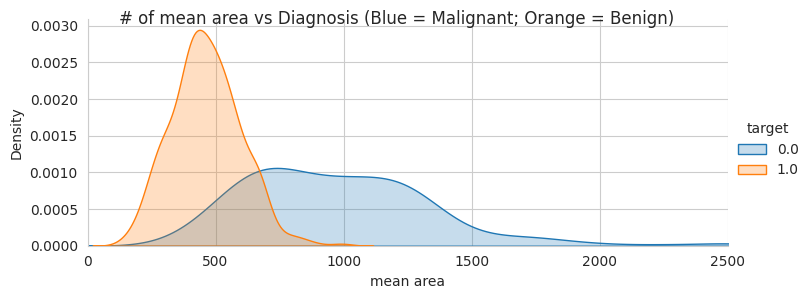

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


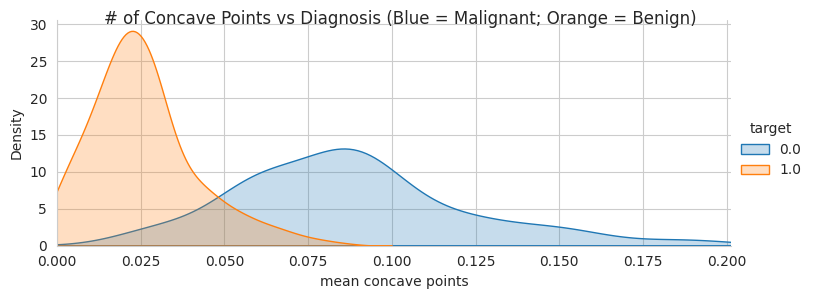

In [45]:
sns.set_style('whitegrid')
plotOne = sns.FacetGrid(df,hue = 'target',aspect = 2.5)
plotOne.map(sns.kdeplot,'mean area',shade = True)
plotOne.set(xlim = (0,df['mean area'].max()))
plotOne.add_legend()
plotOne.fig.suptitle('# of mean area vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show()

sns.set_style('whitegrid')
plotTwo = sns.FacetGrid(df,hue = 'target',aspect = 2.5)
plotTwo.map(sns.kdeplot,'mean concave points',shade = True)
plotTwo.set(xlim = (0,df['mean concave points'].max()))
plotTwo.add_legend()
plotTwo.fig.suptitle('# of Concave Points vs Diagnosis (Blue = Malignant; Orange = Benign)')
plt.show();


<Axes: >

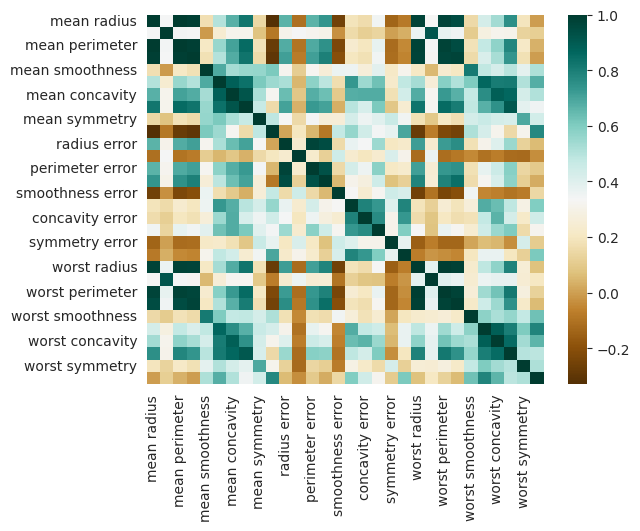

In [49]:
sns.heatmap(x_train.corr(),cmap="BrBG",annot = False)

['mean radius', 'mean texture', 'mean smoothness', 'texture error']


<Axes: >

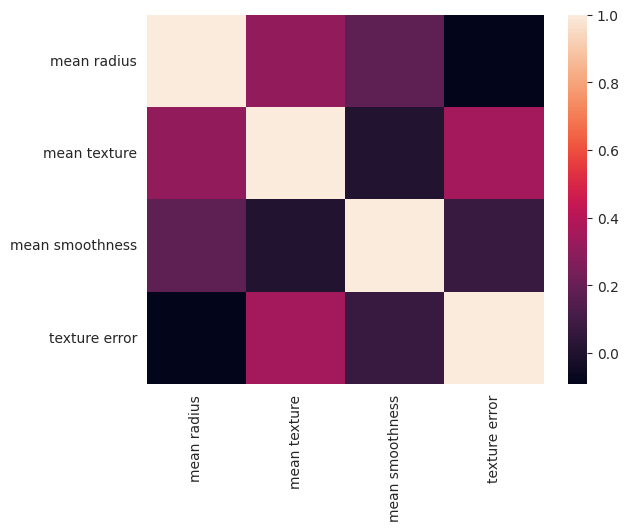

In [69]:
# Feature Selection method 1

corr_matrix = np.abs(x_train.corr())
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool_))
corr_cols = [column for column in upper_tri.columns if any(upper_tri[column]>0.4)]
uncorr_cols = [column for column in x_train.columns if column not in corr_cols]
print(uncorr_cols)

X2 = df[uncorr_cols]
y2 = df['target']

x_train2,x_test2,y_train2,y_test2 = train_test_split(X2,y2,test_size=0.2,random_state = 42)
sns.heatmap(x_train2.corr())


In [70]:
# Feature Selection Method 2

from sklearn.decomposition import PCA
X3 = X
y3 = y
variance_pct = 5
pca = PCA(n_components=variance_pct)
X_transformed = pca.fit_transform(X3,y3)
X3pca = pd.DataFrame(X_transformed)
x_train3,x_test3,y_train3,y_test3 = train_test_split(X3,y3,test_size=0.2,random_state = 42)

In [73]:
X3pca.columns.values

array([0, 1, 2, 3, 4])

In [76]:
clf1 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf = 12)
clf1.fit(x_train,y_train)

clf2 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf = 12)
clf2.fit(x_train2,y_train2)

clf3 = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf = 12)
clf3.fit(x_train3,y_train3)

print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(x_test, y_test)))
print('Accuracy of Decision Tree classifier on reduced training set: {:.2f}'.format(clf2.score(x_train2, y_train2)))
print('Accuracy of Decision Tree classifier on reduced test set: {:.2f}'.format(clf2.score(x_test2, y_test2)))
print('Accuracy of Decision Tree classifier on PCA-transformed training set: {:.2f}'.format(clf3.score(x_train3, y_train3)))
print('Accuracy of Decision Tree classifier on PCA-transformed test set: {:.2f}'.format(clf3.score(x_test3, y_test3)))


Accuracy of Decision Tree classifier on original training set: 0.94
Accuracy of Decision Tree classifier on original test set: 0.90
Accuracy of Decision Tree classifier on reduced training set: 0.89
Accuracy of Decision Tree classifier on reduced test set: 0.89
Accuracy of Decision Tree classifier on PCA-transformed training set: 0.96
Accuracy of Decision Tree classifier on PCA-transformed test set: 0.95


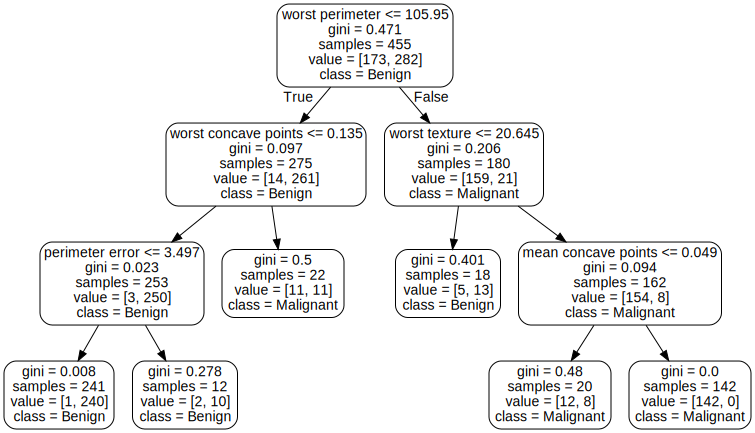

In [82]:
feature_names1 = X.columns.values
feature_names2 = X2.columns.values
feature_names3 = X3.columns.values
def plot_decision_tree(a,b):
  dot_plot = tree.export_graphviz(a,out_file = None,
                                 feature_names=b,
                                  class_names = ['Malignant','Benign'],
                                  filled = False,
                                  rounded = True,
                                  special_characters = False)
  graph = graphviz.Source(dot_plot)
  return graph
plot_decision_tree(clf1,feature_names1)


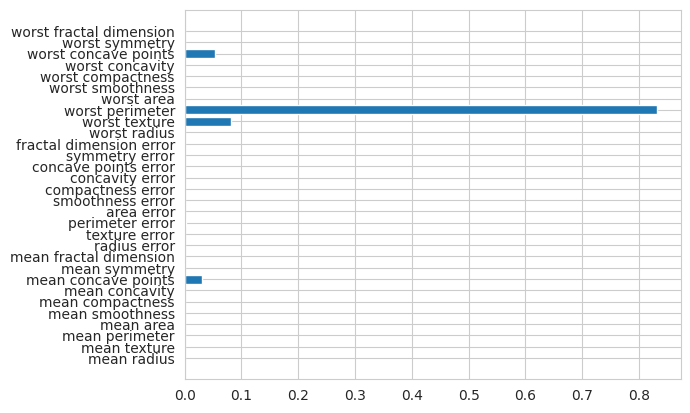

In [85]:
def plot_feature_importances(clf,feature_names):
  c_features = len(feature_names)
  plt.barh(range(c_features),clf.feature_importances_)
  plt.yticks(np.arange(c_features),feature_names)
plot_feature_importances(clf1,feature_names1)

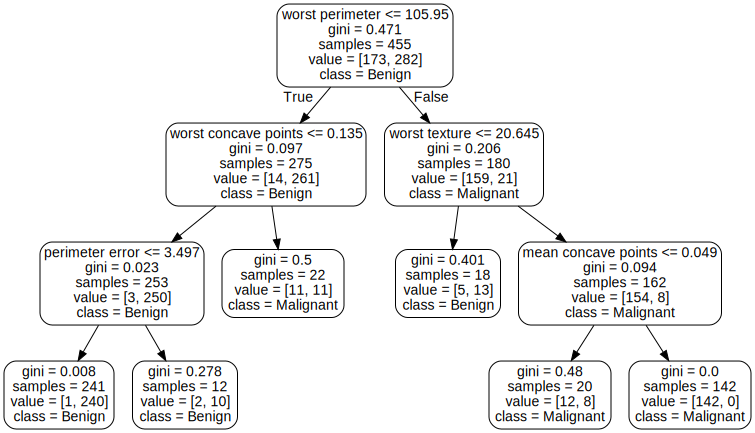

In [86]:
plot_decision_tree(clf1,feature_names1)

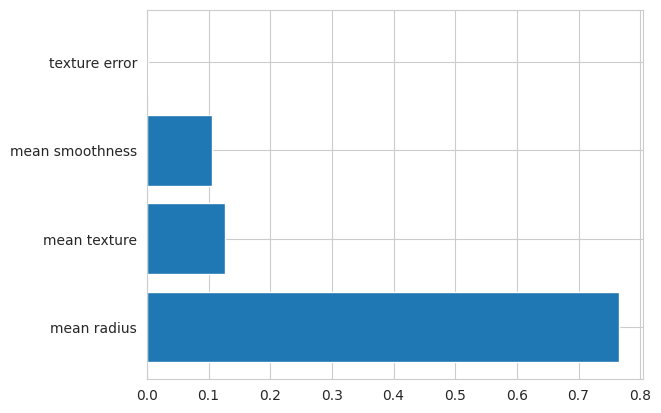

In [88]:
plot_feature_importances(clf2, feature_names2)
plt.show()

In [89]:
(X1, y1) = load_breast_cancer(return_X_y = True)
X_train1,X_test1,Y_train1,Y_test1=train_test_split(X1,y1,random_state=0)
clf = RandomForestClassifier(max_features=8,random_state=0)
clf.fit(X_train1,Y_train1)
print('Accuracy of Random Forest Classifier on training data: {:.2f}'.format(clf.score(X_train1,Y_train1)))
print('Accuracy of Random Forest Classifier on testing data: {:.2f}'.format(clf.score(X_test1,Y_test1)))

Accuracy of Random Forest Classifier on training data: 1.00
Accuracy of Random Forest Classifier on testing data: 0.97
